# PageRank Algorithmus

PageRank ist ein Algorithmus um zu entscheiden wie relevant Websites sind im Verhältins zueinander. Websites werden modelliert wie Knoten oder Ecken in einem gerichten Graph und die Kanten kommen von Links zwischen Websites. Nehme zum Beispiel ein Internet mit nur vier Websites: $w_0$, $w_1$, $w_2$ und $w_3$.

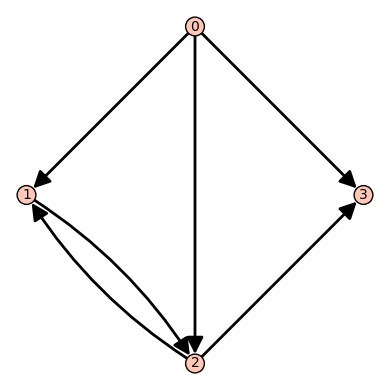

In [107]:
D = DiGraph({0:[1,2,3],1:[2],2:[3,1]})
D.show(layout='circular')

Im obigen Figur enthält $w_2$ also wenigstens zwei Links, wenigstens einen davon geht nach $w_1$ und wenigstens eienen nach $w_3$, alle übrigen gehen entwered nach $w_1$ oder $w_3$. Das heißt, auch wenn es mehere Links von $w_2$ nach $w_1$ gäbe, würden die alle mit nur einer Kante bezeignet worden. Jetzt postulieren wir dass, wenn wir das Internet benutzen, wir genau an einem Website sind. Die Relevanz einer Website ist dann die Change das wir uns an dieser Website befinden. Präziser definieren wir die Menge der stochastischen Bewertungen der Websites im Internet $G = (V, E, s, t)$ wie

$$
PR(G) = \left\{ (r_v)_{v \in V} \in \mathbb{R}^V \mid \sum_{v \in V} r_v = 1 \right\}.
$$

In unserem Beispiel ist also $V = \{ w_0, w_1, w_2, w_3 \}$ und $E$ ist die Menge der sechs Kanten die von $s,t: E \rightarrow V$ Anfang und Ende zugewiesen werden.

Weiter nehmen wir an, dass ein Benutzer die Links auf einer Website benutzt um zu navigieren und dass jede gelinktete Website mit demsleben Wahrscheinlichkeit erreicht wird. Wenn er sich an einer Website $w_i$ befindet, ist die Wahrscheinlichkeit dass er sich als nächtes an der Website $w_j$ befindet also:

$$
\mathbb{P}(w_j \text{wird am nächsten besucht } \mid w_j \text{ wird jetzt besucht}) = \begin{cases}
\frac{1}{k} &, \exists e \in E, s(e) = w_i \wedge t(e) = w_j\\
0 & \text{sonst}
\end{cases}
\newline
k = \left| \left\{ e \in E \mid s(e) = w_i \right\} \right|
$$

Diese Situation können wir mit einer Matrix $A$ beschreiben. Setzen wir
$$
A_{ji} = \mathbb{P}(w_j \text{wird am nächsten besucht } \mid w_j \text{ wird jetzt besucht}),
$$
dann lasst unseres Beispiel sich durch der folgenden Matrix beschreiben
$$
A = 
\begin{pmatrix}
0 & 0 & 0 & 0\\
\frac{1}{3} & 0 & \frac{1}{2} & 0\\
\frac{1}{3} & 1 & 0 & 0\\
\frac{1}{3} & 0 & \frac{1}{2} & 0
\end{pmatrix}
$$
Es gibt verschiedene Probleme die auftreten können, wir sehen nähmlich schön, dass unter unsere annahmen, die Website $w_3$ nie verlassen werden kann. Dass ist nicht sehr realistisch. Eine lösung ist um zu jedem Link nach $w_3$, einen Link in der Rückrichtung hinzu zu fügen. Dies würde meinen dass wir den 'vorherige'-knopf im Browser benutzen. Aber meistens werden in so einer Situation keine Annahmen gemacht über welche Website der Benutzer am nächsten besucht, d.h. $A_{j3} = \frac{1}{|G|}$ $j = 0, \dots ,3$. Die Matrix wird dann so aussehen:
$$
A = 
\begin{pmatrix}
0 & 0 & 0 & \frac{1}{4}\\
\frac{1}{3} & 0 & \frac{1}{2} & \frac{1}{4}\\
\frac{1}{3} & 1 & 0 & \frac{1}{4}\\
\frac{1}{3} & 0 & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}.
$$
Ein zweites Problem kann sein, dass der Graph $G$ nicht zusammenhängend ist. Es kann also mehrere Zusammenhangskomonenten geben. Obwohl diese Situation nicht wahrscheinlich ist, weil das Internet einfach zu groß ist, ist sie in unsere kleine Beispiele sicher nicht undenkbar. Eine Lösung zu diesem Problem ist eine Buffermatrix zu nehmen
$$
B = \frac{1}{|G|}\begin{pmatrix}
1 & 1 & \cdots & 1 \\
1 & \ddots & & 1 \\
\vdots & &  & \vdots\\
1 & 1 & \cdots & 1 \\
\end{pmatrix}
\qquad M = (1 - p)A + pB \qquad p \in [0,1]
$$
Die Zahl $p$ heißt damping factor und stellt die Wahrscheinlichkeit dar, dass ein benutzer nicht mit den Links auf den Websites navigiert, sonder random eine neue Adresse eintyp. M ist dann eine Matrix mit schöne eigenschaften

* $M_{ij} > 0 \quad \forall i,j$, mann sagt $M$ ist positiv
* $\sum_{i = 1}^{|G|} M_{ij} = 1 \quad \forall j$, mann sagt $M$ ist spaltenstochastisch 

**Perron-Frobenius Satz**

Es sei $M$ eine positive spaltenstochstische Matrix, dann ist $1$ ein Eigenwert von geometrische Viefachkeit $1$ und alle sonstige Eigenwerte sind kleiner als $1$. Außerdem ist ein Eigenvektor von $1$ entweder positiv oder negativ.

Schauen wir uns jetzt den Eigenvektor $v$ von $1$ an, die positiv ist und spaltenstochastisch, d.h.

$$\sum_{i = 1}^{|G|} v_i = 1,$$

dann können wir $v_i$ sehen wie die Wahrscheinlichkeit dass ein Benutzer des Internets sich an der Website $w_i$ befindet. Weil $Mv  =v$ gilt ist diese Auslegung auch noch sinnvoll wenn einmal, und deswegen endlich oft, navigiert wird.

Aber was passiert wenn wir voraus setzen, dass jede Website am Anfang die gleiche Wahrscheinlichkeit hat besucht zu werden?

$$
v_0 = \frac{1}{|G|}\begin{pmatrix}1\\1\\ \vdots \\ 1\end{pmatrix}
$$

Dann ist die Wahrscheinlichkeitsverteilung der aktuelle Position in $G$ nach $n$ Mal navigieren, gegeben durch

$$A^n v_0$$

und ganz naiv machen wir die folgende Bemerkung
$$
\text{lim}_{n\rightarrow \infty} A^n v_0 = \text{lim}_{n\rightarrow \infty} A A^{n-1} v_0 = A \text{lim}_{n\rightarrow \infty} A^n v_0
$$
Dies würde implizieren, dass 
$$
\text{lim}_{n\rightarrow \infty} A^n v_0 = \lambda v \qquad \lambda \in \mathbb{R}^*
$$
Das ist auch so weil $A$ ein Eigenwert $1$ hat, so dass $A^n$ nicht gegen Null konvergiert. Weiter sind die übrige Eigenwerte kleiner als $1$, so dass $A^n$ nicht divergiert. Weil $v_0$ positiv ist, ist $\lambda$ das auch.

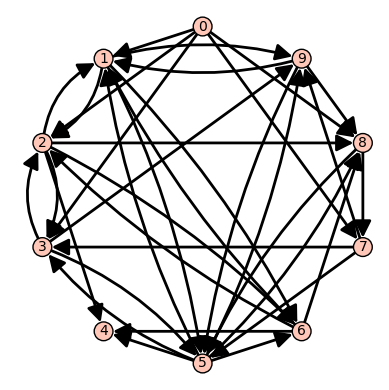

/var/folders/h8/m66mt1gj2nsfm5_n83mj3jy00000gn/T/ipykernel_22108/3882630056.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See http://trac.sagemath.org/22349 for details.
  g = len(G.vertices())


[   0    0    0    0 1/10    0    0    0    0    0]
[ 1/5    0  1/5    0 1/10  1/6  1/4    0    0  1/3]
[ 1/5  1/4    0  1/3 1/10    0  1/4    0    0    0]
[ 1/5    0  1/5    0 1/10  1/6    0  1/3    0    0]
[   0    0  1/5    0 1/10  1/6  1/4    0    0    0]
[   0  1/4    0  1/3 1/10    0    0  1/3  1/2  1/3]
[   0  1/4  1/5    0 1/10  1/6    0    0    0    0]
[ 1/5    0    0    0 1/10    0    0    0  1/2    0]
[ 1/5    0  1/5    0 1/10  1/6  1/4    0    0  1/3]
[   0  1/4    0  1/3 1/10  1/6    0  1/3    0    0]
0.0


In [242]:
G = DiGraph({0:[1,2,3,7,8],1:[2,5,6,9],2:[1,3,4,6,8],3:[2,5,9],4:[],5:[1,3,4,6,8,9],6:[1,2,4,8],7:[3,5,9],8:[5,7],9:[1,5,8]})
G.show(layout='circular')

g = len(G.vertices())

A = matrix(QQ, g, g, lambda i, j: 1 / len(G.neighbors_out(j)) if (i in G.neighbors_out(j)) else 0)

ones = matrix(QQ, 1, g, lambda i, j: 1)

for i in range(g):
    if ones*A[:,i] == 0:
        A[:,i] = 1/g * transpose(ones)

# A.eigenvectors_right() gibt Tripel (l, ev, m) mit
# l ein Eigenwert
# ev eine Liste mit zugehörigen Eigenvektoren
# m die zugehörige Vielfachkeit
v = transpose(matrix(A.eigenvectors_right()[0][1][0]))

print(A)
print(norm(v - A*v))

Jetzt werden wir versuchen zu zeigen, dass $A^n v_0$ gegen $v$ konvergiert

In [246]:
if v[0] < 0:
    v = -1*v
v = (1 / (ones*v)[0][0]) * v
v0 = transpose((1/g)* ones)


# ändern Sie n >> 0 und begeistern Sie sich für das Ergebnis
n = 1
print(norm(A^n * v0 - v))

0.036820419076040424


Berechenen Sie den Eigenvektor zugehörig zum Eigenwert $1$ in der folgenden Situation, mit $p = 0$:

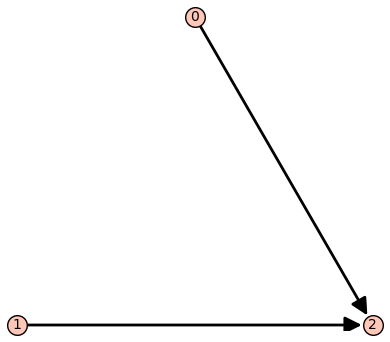

In [178]:
Gsmall = DiGraph({0:[2], 1:[2]})
Gsmall.show(layout='circular')

Kontrollieren Sie unten Ihre Antwort

In [247]:
Asmall = matrix(QQ, [[0,0,1/3],[0,0,1/3],[1,1,1/3]])

vsmall = Asmall.right_eigenvectors()[0][1][0]/5
print(vsmall)

(1/5, 1/5, 3/5)


In [272]:
from IPython.display import clear_output
v0small = vector([1/3,1/3,1/3])
zero = vector([0,0,0])


for i in range(14):
    clear_output(wait=true)
    S = (arrow(zero,vsmall) + arrow(zero,Asmall^i * v0small,color=(1,0,0)) + arrow((0,0,0),(1,0,0),width=0) +arrow((0,0,0),(0,1,0),width=0) + arrow((0,0,0),(0,0,1),width=0))
    S.rotate([0,1,-1],pi/2).show(aspect_ratio=[1,1,1],frame_aspect_ratio=1,axes=True)
    sleep(float(0.75))



Graphics3d Object